<a href="https://colab.research.google.com/github/fabioismerim/deep_learning/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN (Artificial Neural Network) to classification based problem
### Churn prediction


In [1]:
#!pip install tensorflow-gpu
#!pip install scikit-plot

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import (roc_auc_score, roc_curve, auc, accuracy_score)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer, LeakyReLU, PReLU, ELU, ReLU, Dropout                                    
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scikitplot as skplt


%matplotlib inline
plt.style.use('fivethirtyeight')

rcParams['figure.figsize'] = 11,8

In [3]:
print(tf.__version__)

2.9.2


In [4]:
df = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## features and label

X = df.iloc[:,3:-1]
y = df['Exited']


In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
## feature Egineering
X_onehot = pd.get_dummies(X, drop_first=True)
X_onehot.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


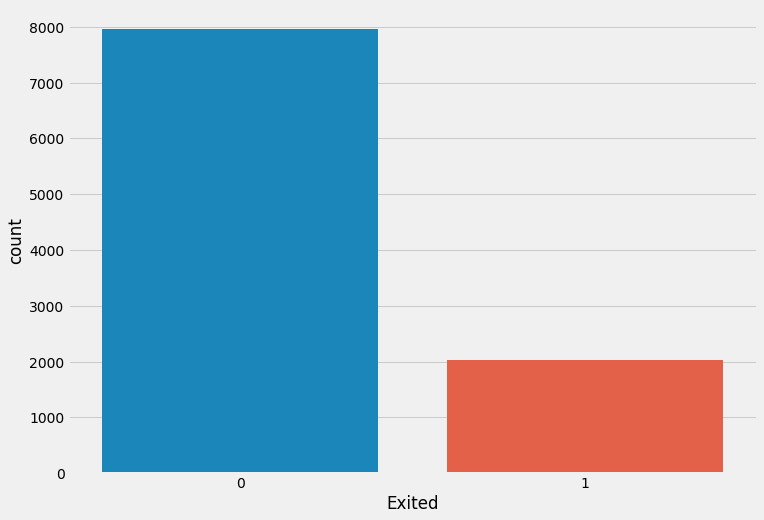

In [9]:
sns.countplot(x=y)
plt.show()

to unbalanced data we need stratify train-test split

In [10]:
##train-test split
X_train, X_test, y_train, y_test = train_test_split(X_onehot,
                                                    y, 
                                                    test_size=.2, 
                                                    stratify = y,
                                                    random_state = 0)

In [11]:
## feature Scaling 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[-1.24021723,  0.77986083,  0.35390313, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.75974873, -0.27382717,  0.35390313, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [-1.72725557, -0.9443559 , -0.3390904 , ..., -0.57812007,
        -0.57504086, -1.09665089],
       ...,
       [-0.51484098,  0.87565065,  1.39339343, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [ 0.73902369, -0.36961699, -1.03208393, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.95663657, -1.32751517,  0.35390313, ..., -0.57812007,
         1.73900686,  0.91186722]])

In [13]:
X_test

array([[-1.975956  ,  0.1093321 ,  0.35390313, ...,  1.72974448,
        -0.57504086, -1.09665089],
       [ 0.64576103, -1.42330499,  0.7003999 , ...,  1.72974448,
        -0.57504086, -1.09665089],
       [ 0.12763513,  2.40828774,  0.35390313, ..., -0.57812007,
         1.73900686,  0.91186722],
       ...,
       [-1.20912968,  0.20512192,  1.39339343, ..., -0.57812007,
        -0.57504086,  0.91186722],
       [ 1.10171182,  1.54617938,  1.39339343, ..., -0.57812007,
         1.73900686, -1.09665089],
       [ 0.9773616 , -0.75277626, -0.68558716, ..., -0.57812007,
         1.73900686, -1.09665089]])

In [14]:
X_train.shape

(8000, 11)

## Build ANN Model

notes: Dropout layer is like a Regularization parameter (deactivate neurons in that layer)

In [15]:
classifier = Sequential()

In [16]:
## add input layer
## 11 cause we 've 11 features in dataset
classifier.add(Dense(units = 11, activation = "relu"))

In [17]:
## add first hidden layer
classifier.add(Dense(units = 7,
                     activation = 'relu'))

In [18]:
## second layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [19]:
## output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [20]:
auc_metric = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
)

loss_function = tf.keras.losses.BinaryCrossentropy(
    from_logits = False,
    label_smoothing = 0.0,
    axis = 1,
    reduction = 'auto',
    name = 'binary_crossentropy',
)

In [21]:
classifier.compile(optimizer = 'adam',
                   loss = loss_function,
                   metrics = auc_metric)

In [22]:
## Early Stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [23]:
model_history = classifier.fit(X_train, 
                               y_train,
                               validation_split=.33,
                               batch_size = 10,
                               epochs = 1000,
                               callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 7s 9ms/step - loss: 0.5436 - auc: 0.5829 - val_loss: 0.4273 - val_auc: 0.7579
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4223 - auc: 0.7789 - val_loss: 0.4004 - val_auc: 0.7914
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3906 - auc: 0.8134 - val_loss: 0.3761 - val_auc: 0.8110
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3670 - auc: 0.8342 - val_loss: 0.3710 - val_auc: 0.8226
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3547 - auc: 0.8453 - val_loss: 0.3618 - val_auc: 0.8250
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3478 - auc: 0.8517 - val_loss: 0.3615 - val_auc: 0.8269
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3430 - auc: 0.8573 - val_loss: 0.3584 - val_auc: 0.8310
Epoch 8/1000
536/536 [==============================] - 2s 3ms

In [24]:
model_history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

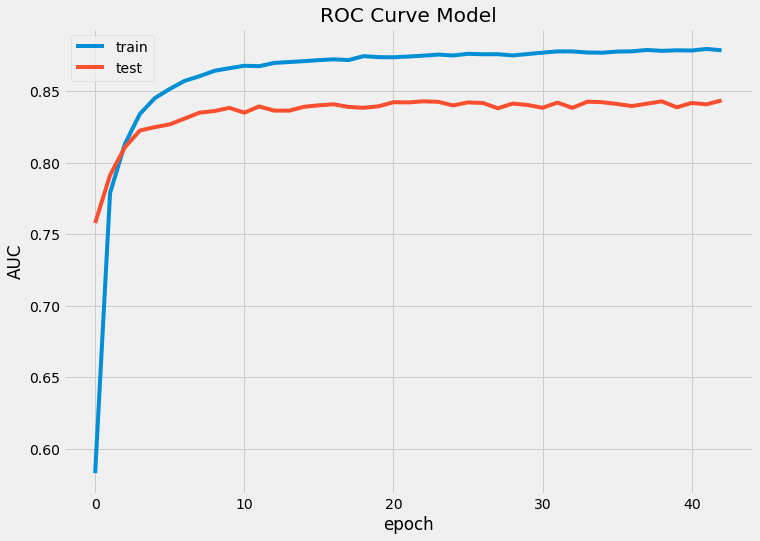

In [25]:
## Summarize history for accuracy

plt.plot(model_history.history['auc'])
plt.plot(model_history.history['val_auc'])
plt.title('ROC Curve Model')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

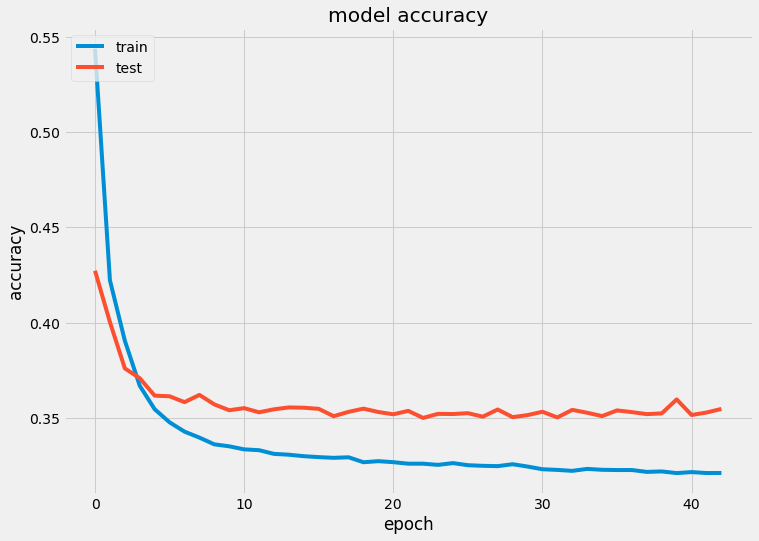

In [26]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

#### make predictions

In [27]:
y_pred = classifier.predict(X_test) #make probabilites predicitons as default
y_pred_proba = y_pred
y_pred = (y_pred >= .5).astype(int) #change to categories

print('probabilites: \n', y_pred_proba)
print('------------')
print('------------')
print('categories: \n', y_pred)

63/63 [==============================] - 1s 8ms/step
probabilites: 
 [[0.14542888]
 [0.14919336]
 [0.10673825]
 ...
 [0.03254497]
 [0.9999912 ]
 [0.04425868]]
------------
------------
categories: 
 [[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


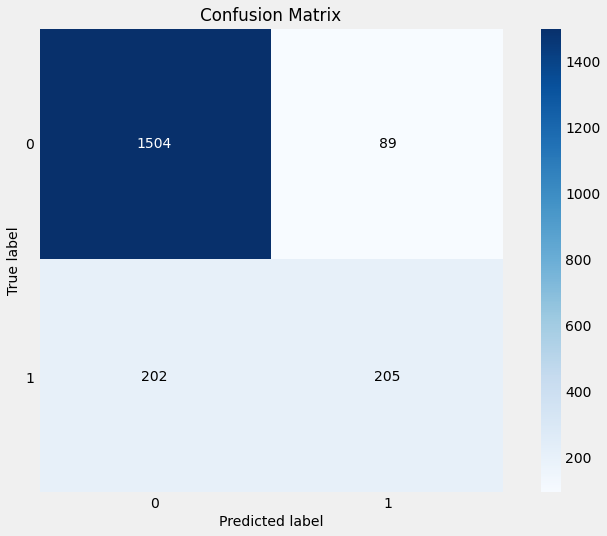

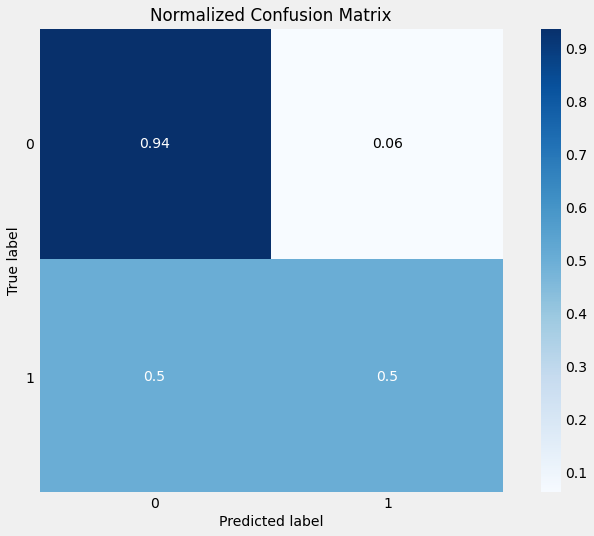

In [28]:
#confusion matrix

skplt.metrics.plot_confusion_matrix(y_test,y_pred)
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize = True)
plt.show()

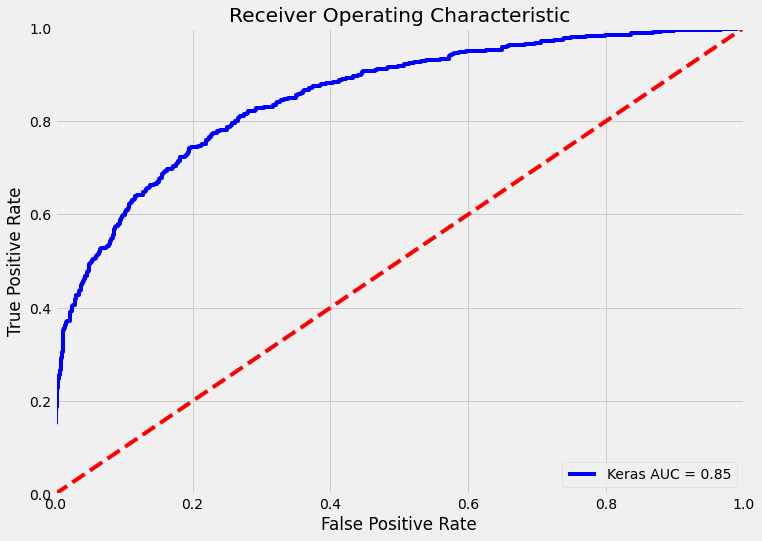

In [29]:
#AUC PLOT

keras_fpr, keras_tpr, threshold = roc_curve(y_test, y_pred_proba)
keras_roc_auc = auc(keras_fpr, keras_tpr)

#plot
plt.title('Receiver Operating Characteristic')
plt.plot(keras_fpr, keras_tpr, 'b', label = 'Keras AUC = %0.2f' % keras_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
acc_score = accuracy_score(y_pred, y_test)
acc_score

0.8545